# In this Notebook I am going to Work on **Car_Price_Prediction** dataset, which is given by **CarDekho.com**

# **Details** of this Dataset

In this **Car_Price_Prediction** dataset we have **Total 8 columns.**

## **Columns :**
### **Independent Variables**
- **Name -->** Names of all models from companies.
- **Year -->** In which year Car was Purchesed.
- **km_driven -->** This columns tell us that how much a car drived.
- **fuel -->** It is shos that on which type of fuel car works.
- **seller_type -->** This is columns tell that who is the seller of that perticular Car.
- **transmiss -->** It is showing which type of handovering is for that car.

### **Dependent Variables**
- **selling_price -->** Basicaly we have this columns this is our **Output** column. We have to predict the prices of the cars.

# Lets Talk about **What we have to Do** in this project.

**1**- Import Required **Libreries**.

**2**- Importing the **Dataset**.

**3**- **Checking** the dataset what are the **columns** we have.

**4**- Checking for **Null** **Values**. If yes then **remove** that.

**5**- See **catagorical values**.

**6**- Now Do **EDA**

**7**- Lets Do **Feature Engineering**

**8**- **Hyperparameter Tuning**

**9**- **Training Models**

**10**- Sae the model for **Future** use


# Lets Import the **Required Libreries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, power_transform

# Lets Load the **Dataset**

In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/Datasets/Car_Details_v1.csv'
df = pd.read_csv(path)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Lets have a **raw** look on the **dataset**

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## **Observations** -

- As we can see in this dataset we have only **three** **numerical** columns.

- From **three** columns **one** is our **output** column that is **selling_price**
### Numerical Columns -
- **year** -
  - **Minimum** = 1992
  - **Maximum** = 2020
  - **Mean** = 2014
- **km_driven** -
  - **Minimum** = 1 km
  - **Maximum** = 806599 km
  - **Mean** = 66215.77 km

# Checking for **Null Values**

In [ ]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**As we can see in this dataset we don't have any Missing Values**

# See **Catagorical Values**

In [ ]:
# print("Fuel :",df['fuel'].unique())
# print("Seller_type :", df['seller_type'].unique())
# print("Trainsmission :", df['transmission'].unique())
# print("Owner :", df['owner'].unique())

for column in df.select_dtypes('object'):
  print(column,":" ,df[column].unique())
  print("-----------------------\n")

name : ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
-----------------------

fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
-----------------------

seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
-----------------------

transmission : ['Manual' 'Automatic']
-----------------------

owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
-----------------------



## **Observations** -
- In **Name** column we have different types of categories of **Cars**.
- In **Fuel** column we have **4 categories**
  - Petrol
  - Diesel
  - CNG
  - LPG
  - Electric
- In **Seller Type** we have **3 categories**
  - Individual
  - Dealer
  - Trustmark Dealer
- In **Transmission** column we have **2 categories**
  - Manual
  - Automatic
- In **Owner** column we have **5 categories**
  - First Owner
  - Second Owner
  - Third Owner
  - Fourth & Above Owner
  - Test Drive Car

# Lets Do **EDA**

# **Countplot** of Some **Columns** that seems **Important**

## **Lets Take Object Columns**

In [ ]:
df.select_dtypes('object')

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,Diesel,Individual,Manual,First Owner


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

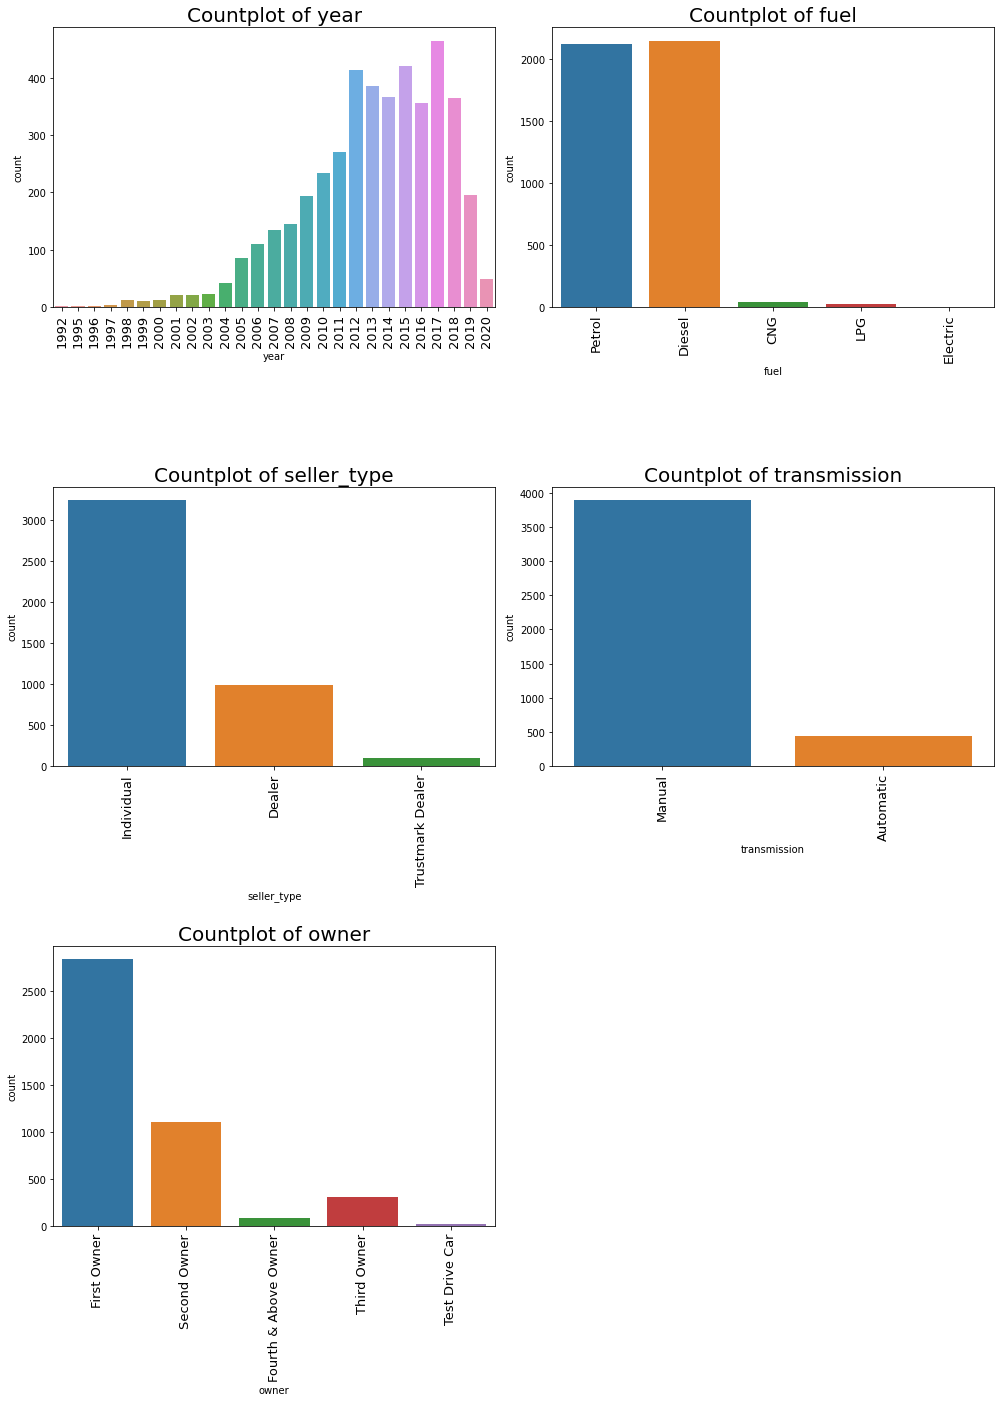

In [ ]:
#	fuel	seller_type	transmission	owner
col = ['year','fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(14,30))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout();

# **Observations**
## Countplot of **Year**-
- We have Maximum values between 2011 to 2018.
- Minimum values between 1992 to 2003.

## Countplot of **Fuel**-
- In this dataset we have maximum cars which works on **Petrol** & **Diesel**.
- Then **CNG** and then **LPG**
- **Electric Cars** are as **negligible** means **few** of **cars**.

## Countplot of **seller_type**-
- We have **three** types of **seller types** for selling the cars.
- **Maximum** no of **seller type** is **Individual**, then **Dealer**, and **Minimum** no of **seller type** is **Trustmark Dealer**

## Countplot of **Transmission**-
- We have **two** types of **Transmission**, **Manual** and **Automatic**.
- **Maximum** no of **Transmission** is **Manual**
- **Minimum** no of **Transmission** is **Automatic**

## Countplot of **Owner**-
- We have **five** type of **Owners** for cars
- **Maximum** no of **Owner** is **First Owner, Second Owner > Third Owner > Fourth Owner**
- **Minimum** no of **Owner** is **Test Drive Cars**

## **Lets Take Numerical Columns**

In [ ]:
df.select_dtypes(exclude='object')

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
...,...,...,...
4335,2014,409999,80000
4336,2014,409999,80000
4337,2009,110000,83000
4338,2016,865000,90000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


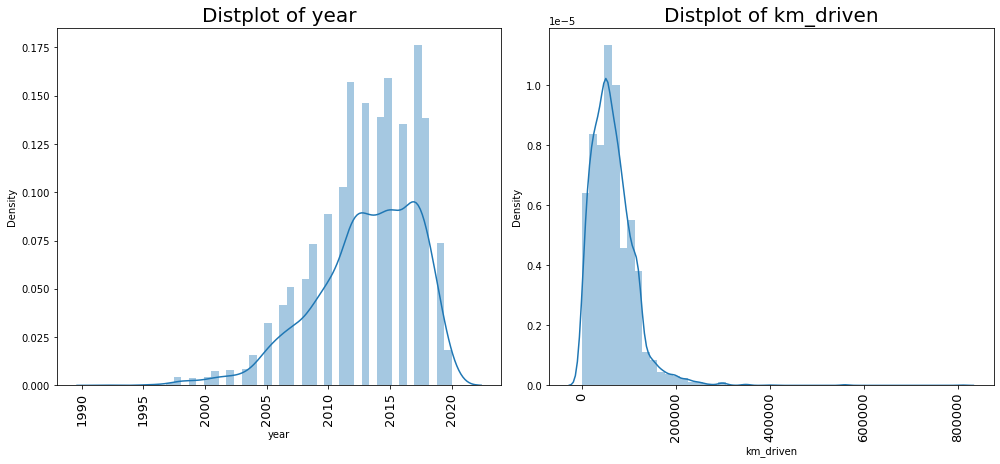

In [ ]:
## year, km_driven
col1 = ['year', 'km_driven']

plt.figure(figsize=(14,30))
for i in range(len(col1)):
  plt.subplot(5,2,i+1)
  sns.distplot(df[col1[i]])
  plt.title(f"Distplot of {col1[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout();

# **Observations**
## Distplot of **Year**
- We have **Left Skewed** graph.
  - It means **Median > Mean**

## Distplot of **km_driven**
- We have **Right Skewed** graph.
  - It means **Mean > Median**

## **Lets Take Both Columns**

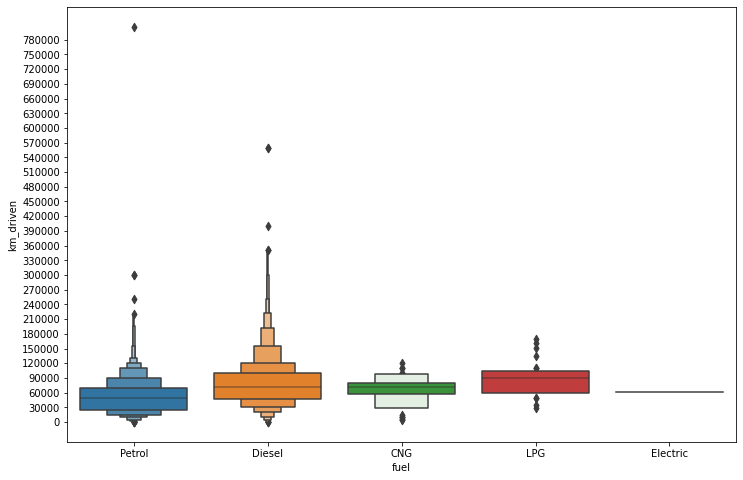

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(data = df, x='fuel', y='km_driven')
plt.yticks(np.arange(0, max(df['km_driven']), 30000));

# **Observation**
## **Petrol**
- Maximum KiloMeters between 20000 to 70000.

## **Diesel**
- Maximum KiloMeters between 40000 to 100000.

## **CNG**
- Maximum KiloMeters between 70000 to 80000.

## **LPG**
- Maximum KiloMeters between 70000 to 100000.

## **Electric**
- We have something values like 70000.

## Checking for **Outliers**

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


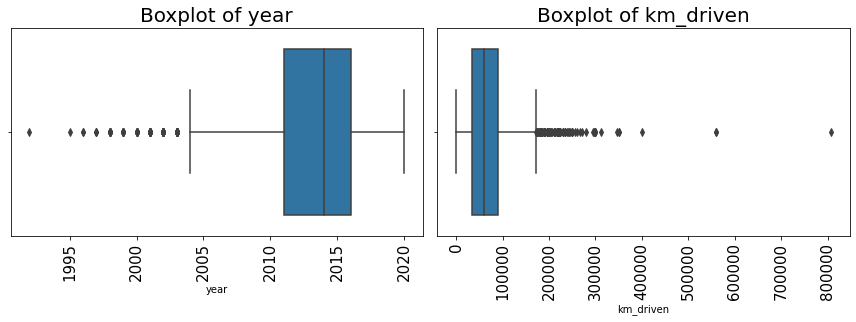

In [ ]:
col4 = ['year', 'km_driven']

plt.figure(figsize=(12,20))
for i in range(len(col4)):
  plt.subplot(5,2, i+1)
  sns.boxplot(df[col4[i]])
  plt.title(f"Boxplot of {col4[i]}", fontsize=20)
  plt.xticks(rotation=90, fontsize=15)
  plt.tight_layout();

# **Observations**
- We have only two Numerical columns.
- So I don't have to Remove some of Outliers.

**Because this is car's dataset, so from few of them maybe those cars purchased too early and Driven more.**

# Now **Feature Engineering**

Lets have a look on Dataset

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Start With **Name**
- I am going to **short** the **name** of Car's **model**.

In [ ]:
def FeatureExtracting(data):
  ## Making Number of Years from year columns
  data['Current Year'] = 2020
  data['No_of_Year'] = data['Current Year'] - data['year']
  
  return data

In [ ]:
df = FeatureExtracting(df)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current Year,No_of_Year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


## **Droping** Unnessesary Columns

In [ ]:
df = df.drop('name',axis=1)
df = df.drop('year',axis=1)
df = df.drop('Current Year',axis=1)

In [ ]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,No_of_Year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,865000,90000,Diesel,Individual,Manual,First Owner,4


# Now **Split** Our **Datset** into **X** and **y**

In [ ]:
def Split_df(data):
  X = data.drop('selling_price', axis=1)
  y = data['selling_price']
  return X, y

Appling our **Split Function**

In [ ]:
X, y = Split_df(df)

Now we have **X** is like this

In [ ]:
X

,km_driven,fuel,seller_type,transmission,owner,No_of_Year
0,70000,Petrol,Individual,Manual,First Owner,13
1,50000,Petrol,Individual,Manual,First Owner,13
2,100000,Diesel,Individual,Manual,First Owner,8
3,46000,Petrol,Individual,Manual,First Owner,3
4,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...
4335,80000,Diesel,Individual,Manual,Second Owner,6
4336,80000,Diesel,Individual,Manual,Second Owner,6
4337,83000,Petrol,Individual,Manual,Second Owner,11
4338,90000,Diesel,Individual,Manual,First Owner,4


And **Y** is like this

In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

## Checking the **Shape** of X and y

In [ ]:
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (4340, 6)
Shape of y :  (4340,)


In [ ]:
X_new = pd.get_dummies(X, drop_first=True)

In [ ]:
X_new

,km_driven,No_of_Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,6,1,0,0,0,1,0,1,0,1,0,0
4336,80000,6,1,0,0,0,1,0,1,0,1,0,0
4337,83000,11,0,0,0,1,1,0,1,0,1,0,0
4338,90000,4,1,0,0,0,1,0,1,0,0,0,0


## Lets Check **Correlation** between columns

In [ ]:
X_new.corr()

,km_driven,No_of_Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
km_driven,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
No_of_Year,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802
owner_Fourth & Above Owner,0.097349,0.186361,-0.021054,-0.002094,0.013384,0.011502,0.072322,-0.021395,0.035597,1.000000,-0.080648,-0.008648,-0.037849


Here I can say, here we don't have any column which is higly correlated With each other.

# Now I am going to check the **Feature Importance** for my **new Data**

In [ ]:
Feature_Importance = ExtraTreesRegressor()
Feature_Importance.fit(X_new, y)

ExtraTreesRegressor()

In [ ]:
Feature_Importance.feature_importances_

array([2.46701342e-01, 2.50965205e-01, 1.29819278e-01, 5.76824554e-05,
       2.61480093e-05, 2.13794872e-04, 4.45734021e-02, 7.78119406e-03,
       2.92832081e-01, 8.23138900e-04, 2.13333249e-02, 5.35097015e-04,
       4.33831175e-03])

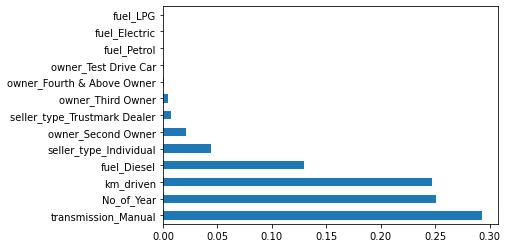

In [ ]:
Feature_Importance = pd.Series(Feature_Importance.feature_importances_, index=X_new.columns)
Feature_Importance.nlargest(20).plot(kind='barh')
plt.show()

# **Observations**
- We have **8 columns** those are **adding some meaning** to my **Prediction**.
- We have **5 columns** those are **not contributing anything** to my **Prediction**.
- So I decided to **drop those columns**.

In [ ]:
X_new = X_new.drop(['fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'owner_Test Drive Car', 'owner_Fourth & Above Owner'], axis=1)
X_new

,km_driven,No_of_Year,fuel_Diesel,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Third Owner
0,70000,13,0,1,0,1,0,0
1,50000,13,0,1,0,1,0,0
2,100000,8,1,1,0,1,0,0
3,46000,3,0,1,0,1,0,0
4,141000,6,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...
4335,80000,6,1,1,0,1,1,0
4336,80000,6,1,1,0,1,1,0
4337,83000,11,0,1,0,1,1,0
4338,90000,4,1,1,0,1,0,0


In [ ]:
X_new.columns

Index(['km_driven', 'No_of_Year', 'fuel_Diesel', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Second Owner', 'owner_Third Owner'],
      dtype='object')

In [ ]:
X_new = X_new.rename(columns = {'seller_type_Trustmark Dealer':'seller_type_Trustmark_Dealer', 'owner_Second Owner':'owner_Second_Owner',
                                'owner_Third Owner':'owner_Third_Owner'})

In [ ]:
X_new

,km_driven,No_of_Year,fuel_Diesel,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Second_Owner,owner_Third_Owner
0,70000,13,0,1,0,1,0,0
1,50000,13,0,1,0,1,0,0
2,100000,8,1,1,0,1,0,0
3,46000,3,0,1,0,1,0,0
4,141000,6,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...
4335,80000,6,1,1,0,1,1,0
4336,80000,6,1,1,0,1,1,0
4337,83000,11,0,1,0,1,1,0
4338,90000,4,1,1,0,1,0,0


# Now Check the **Skewness** of the data

In [ ]:
X_new.skew()

km_driven                       2.669057
No_of_Year                      0.833240
fuel_Diesel                     0.015674
seller_type_Individual         -1.139564
seller_type_Trustmark_Dealer    6.292890
transmission_Manual            -2.609083
owner_Second_Owner              1.125574
owner_Third_Owner               3.370384
dtype: float64

## Removing **Skewness**

In [ ]:
x = X_new
X_new = power_transform(X_new,method='yeo-johnson')
X_new = pd.DataFrame(X_new, columns = x.columns)

## Checking Skewness After Removing

In [ ]:
X_new.skew()

km_driven                       0.045700
No_of_Year                     -0.028922
fuel_Diesel                     0.015674
seller_type_Individual         -1.139564
seller_type_Trustmark_Dealer    6.292890
transmission_Manual            -2.609083
owner_Second_Owner              1.125574
owner_Third_Owner               3.370384
dtype: float64

## Now **Scale** Our Data

In [ ]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new, columns=x.columns)

In [ ]:
X_new

,km_driven,No_of_Year,fuel_Diesel,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Second_Owner,owner_Third_Owner
0,0.283661,1.342447,-0.992196,0.581253,-0.155139,0.339276,-0.584800,-0.274449
1,-0.181462,1.342447,-0.992196,0.581253,-0.155139,0.339276,-0.584800,-0.274449
2,0.854361,0.418836,1.007865,0.581253,-0.155139,0.339276,-0.584800,-0.274449
3,-0.286877,-0.942189,-0.992196,0.581253,-0.155139,0.339276,-0.584800,-0.274449
4,1.491549,-0.045478,1.007865,0.581253,-0.155139,0.339276,1.709986,-0.274449
...,...,...,...,...,...,...,...,...
4335,0.487334,-0.045478,1.007865,0.581253,-0.155139,0.339276,1.709986,-0.274449
4336,0.487334,-0.045478,1.007865,0.581253,-0.155139,0.339276,1.709986,-0.274449
4337,0.545532,1.003663,-0.992196,0.581253,-0.155139,0.339276,1.709986,-0.274449
4338,0.676757,-0.605788,1.007865,0.581253,-0.155139,0.339276,-0.584800,-0.274449


# Now **Train** and **Test Split** Our Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of test : ", y_test.shape)

Shape of X_train :  (3255, 8)
Shape of X_test :  (1085, 8)
Shape of y_train :  (3255,)
Shape of test :  (1085,)


# **Hyperparameter** Tuning

In [ ]:
rf = RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf,
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
predictions = rf_random.predict(X_test)

In [ ]:
predictions

array([179057.58309501, 547304.14449138, 145195.15698739, ...,
       647313.17605203, 614954.70023278, 387795.49451291])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


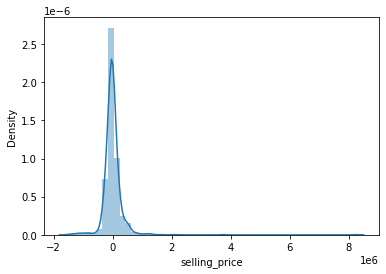

In [ ]:
sns.distplot(y_test-predictions)

# Observation
- My Distplot is showing a graph like Normal Distribution.
- It means the model I have created that giving me Good results.

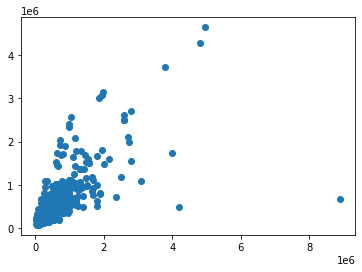

In [ ]:
plt.scatter(y_test, predictions)

# Observation
- The Graph is Linearly Available.
- That means my predicts are pretty much good.

In [ ]:
# import pickle
# file = open('Car_Price_RandomForestRegressor_model.pkl', 'wb')

# # dump information to that file
# pickle.dump(rf_random, file)

## Hello Sir, This is my **First Project**

**I tried my best But i am not getting very good Score 
So Please have a look and suggest me what else i can do.**

### If anything is not right please tell sir.

# **Thankyou Sir**